In [1]:
import pandas as pd

# Loading data files with multiple formats

In [2]:
coffee = pd.read_csv('warmup-data/coffee.csv')

In [3]:
results = pd.read_parquet('data/results.parquet')
bios = pd.read_csv('data/bios.csv')

In [4]:
# olympics_data = pd.read_excel('data/olympics-data.xlsx', sheet_name='results')

# Accessing data with Pandas

In [5]:
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


In [6]:
for Index, row in coffee.iterrows():
    print (Index+1, row['Day'], row['Coffee Type'], row['Units Sold'])

1 Monday Espresso 25
2 Monday Latte 15
3 Tuesday Espresso 30
4 Tuesday Latte 20
5 Wednesday Espresso 35
6 Wednesday Latte 25
7 Thursday Espresso 40
8 Thursday Latte 30
9 Friday Espresso 45
10 Friday Latte 35
11 Saturday Espresso 45
12 Saturday Latte 35
13 Sunday Espresso 45
14 Sunday Latte 35


# Filtering Data

In [7]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [8]:
bios[(bios['height_cm'] > 215) & (bios['born_country'] == 'USA')][['name', 'height_cm','born_country']]

,name,height_cm,born_country
5781,Tommy Burleson,223.0,USA
6722,Shaquille O'Neal,216.0,USA
6937,David Robinson,216.0,USA
123850,Tyson Chandler,216.0,USA


In [9]:
bios[bios['name'].str.contains("Peter | Patrick", case=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
102,103,Peter Knowles,1969-12-28,Stockport,England,GBR,Great Britain,177.0,77.0,NaN
140,141,Peter Franz,1971-04-25,Stolzenau,Niedersachsen,GER,Germany,186.0,74.0,NaN
308,309,Peter Mitterer,1947-04-12,Gmunden,Oberösterreich,AUT,Austria,180.0,79.0,NaN
574,576,Peter Gillam,1956-01-02,Folkestone,England,GBR,Great Britain,180.0,76.0,NaN
621,624,Peter Blackburn,1968-03-25,Ballarat,Victoria,AUS,Australia,179.0,78.0,NaN
...,...,...,...,...,...,...,...,...,...,...
143982,147640,Peter Purcell-Gilpin,1994-07-04,Harare,Harare,ZIM,Zimbabwe,189.0,84.0,NaN
143983,147641,Peter Wetzlar,1997-02-27,Harare,Harare,ZIM,Zimbabwe,NaN,NaN,NaN
144564,148256,Peter Regin,1986-04-16,Herning,Midtjylland,DEN,Denmark,187.0,90.0,NaN
145247,148966,Peter Cehlárik,1995-08-02,Žilina,Žilina,SVK,Slovakia,188.0,90.0,NaN


In [10]:
bios[bios['born_country'].str.contains(("USA|FRA|GBR"), case=False, na = False)]\
    .sort_values(['born_country', 'name'], ascending=[0,1]).head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
11224,11283,Almighty Voice,1873-02-19,Cattaraugus Reservation,New York,USA,Canada,NaN,NaN,1960-08-15
137756,141129,Angelina,2000-01-26,Livingston,New Jersey,USA,Brazil,160.0,57.0,NaN
19849,19989,Islah-ud-Din,1948-01-10,Long Island City,New York,USA,Pakistan,174.0,64.0,NaN
87300,87997,A J Kitt,1968-09-13,Rochester,New York,USA,United States,180.0,92.0,NaN
143485,147137,A'ja Wilson,1996-08-08,Hopkins,South Carolina,USA,United States,193.0,88.0,NaN


In [11]:
bios.query('born_country == "USA" and born_city == "Seattle" and name.str.contains("^al", case=False)')

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
40496,40805,Allen Morgan,1925-07-16,Seattle,Washington,USA,United States,NaN,NaN,2011-09-12
40603,40913,Al Ulbrickson,1930-10-10,Seattle,Washington,USA,United States,NaN,NaN,2012-07-06
61918,62373,Alan Holt,1939-06-29,Seattle,Washington,USA,United States,178.0,73.0,NaN


# Adding and Removing columns

In [12]:
import numpy as np
coffee['price'] = np.where(coffee['Coffee Type']=='Espresso', 3.99, 5.99)
coffee['revenue'] = coffee['Units Sold'] * coffee['price']

In [13]:
coffee.drop([1,2]).head()
coffee.drop(np.where(coffee['Units Sold'] < 30)[0]).head()

,Day,Coffee Type,Units Sold,price,revenue
2,Tuesday,Espresso,30,3.99,119.70
4,Wednesday,Espresso,35,3.99,139.65
6,Thursday,Espresso,40,3.99,159.60
7,Thursday,Latte,30,5.99,179.70
8,Friday,Espresso,45,3.99,179.55


In [14]:
np.where((coffee['Units Sold'] < 30) & (coffee['Coffee Type'] == 'Espresso'),2.99,5.99)

array([2.99, 5.99, 5.99, 5.99, 5.99, 5.99, 5.99, 5.99, 5.99, 5.99, 5.99,
       5.99, 5.99, 5.99])

In [15]:
coffee.rename(columns={'price': 'Unit Price', 'revenue': 'Revenue($)'}, inplace=True)

In [16]:
coffee.head()

,Day,Coffee Type,Units Sold,Unit Price,Revenue($)
0,Monday,Espresso,25,3.99,99.75
1,Monday,Latte,15,5.99,89.85
2,Tuesday,Espresso,30,3.99,119.70
3,Tuesday,Latte,20,5.99,119.80
4,Wednesday,Espresso,35,3.99,139.65


In [17]:
bios['height_m'] = bios['height_cm'] / 100

In [18]:
bios['birth_year'] = pd.to_datetime(bios['born_date'],errors='coerce').dt.year.fillna(0).astype('int64')

In [19]:
bios['first_name'] = bios['name'].str.split(' ').str[0]

In [20]:
bios[['first_name','last_name']] = bios['name'].str.split(' ', n=1, expand =True)

**Custom Columns**

In [21]:
bios['height_cat'] = bios['height_cm'].apply(lambda x: 'Short' if x<160 else('Medium' if x<175 else 'Tall'))

In [22]:
bios.query('height_cat.str.contains("Short|Medium")')[['name', 'height_cm','height_cat']]\
    .equals(bios[bios['height_cat'].str.contains("Short|Medium")][['name', 'height_cm','height_cat']])

True

In [23]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_m,birth_year,first_name,last_name,height_cat
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,NaN,1886,Jean-François,Blanchy,Tall
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1.83,1969,Arnaud,Boetsch,Tall
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1.83,1898,Jean,Borotra,Tall
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1.68,1895,Jacques,Brugnon,Medium
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,NaN,1878,Albert,Canet,Tall


In [24]:
def lived_cat(row_data):
    born = pd.to_datetime(row_data['born_date'], errors='coerce').year
    died = pd.to_datetime(row_data['died_date'], errors='coerce').year

    if pd.isna(born) or pd.isna(died):
        return np.nan
        
    if  (abs(born - died)) <=30:
        return 'Short Lived'
    elif (abs(born - died)) <=50:
        return 'Average Lived'
    else:
        return 'Long Lived'

In [25]:
bios['Life_Cat'] = bios.apply(lived_cat, axis=1)

In [26]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_m,birth_year,first_name,last_name,height_cat,Life_Cat
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,NaN,1886,Jean-François,Blanchy,Tall,Long Lived
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1.83,1969,Arnaud,Boetsch,Tall,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1.83,1898,Jean,Borotra,Tall,Long Lived
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1.68,1895,Jacques,Brugnon,Medium,Long Lived
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,NaN,1878,Albert,Canet,Tall,Long Lived


# Merging and concatenating data

In [27]:
noc_df = pd.read_csv('data/noc_regions.csv')
noc_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [28]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_m,birth_year,first_name,last_name,height_cat,Life_Cat
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,NaN,1886,Jean-François,Blanchy,Tall,Long Lived
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1.83,1969,Arnaud,Boetsch,Tall,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1.83,1898,Jean,Borotra,Tall,Long Lived
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1.68,1895,Jacques,Brugnon,Medium,Long Lived
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,NaN,1878,Albert,Canet,Tall,Long Lived


In [29]:
bios_mergerd = bios.merge(noc_df, left_on='born_country', right_on='NOC', how = 'left', suffixes=[1, 2])

In [30]:
bios_mergerd.rename(columns={'region':'born_country_full'}, inplace=True)

In [31]:
bios_mergerd.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC1,height_cm,weight_kg,died_date,height_m,birth_year,first_name,last_name,height_cat,Life_Cat,NOC2,born_country_full,notes
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,NaN,1886,Jean-François,Blanchy,Tall,Long Lived,FRA,France,NaN
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1.83,1969,Arnaud,Boetsch,Tall,NaN,FRA,France,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1.83,1898,Jean,Borotra,Tall,Long Lived,FRA,France,NaN
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1.68,1895,Jacques,Brugnon,Medium,Long Lived,FRA,France,NaN
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,NaN,1878,Albert,Canet,Tall,Long Lived,GBR,UK,NaN


In [32]:
bios_mergerd.query('NOC1 != born_country_full').head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC1,height_cm,weight_kg,died_date,height_m,birth_year,first_name,last_name,height_cat,Life_Cat,NOC2,born_country_full,notes
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,NaN,1878,Albert,Canet,Tall,Long Lived,GBR,UK,NaN
12,13,J. Defert,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,0,J.,Defert,Tall,NaN,NaN,NaN,NaN
13,14,Étienne Durand,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,0,Étienne,Durand,Tall,NaN,NaN,NaN,NaN
16,17,Guy Forget,1965-01-04,Casablanca,Casablanca-Settat,MAR,France,189.0,79.0,NaN,1.89,1965,Guy,Forget,Tall,NaN,MAR,Morocco,NaN
27,28,"Guy, Baron Lejeune",NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,0,"Guy,",Baron Lejeune,Tall,NaN,NaN,NaN,NaN


In [33]:
usa = bios.query('born_country == "USA"')
mar = bios.query('born_country == "MAR"')
new_df = pd.concat([usa,mar])
new_df.sample(5,random_state=726423784)

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_m,birth_year,first_name,last_name,height_cat,Life_Cat
61691,62144,Jay Glaser,1953-07-11,Santa Monica,California,USA,United States,178.0,70.0,NaN,1.78,1953,Jay,Glaser,Tall,NaN
83146,83804,Bill Baker,1956-11-29,Grand Rapids,Michigan,USA,United States,185.0,89.0,NaN,1.85,1956,Bill,Baker,Tall,NaN
52850,53225,Patti Bright,1940-12-27,Chicago,Illinois,USA,United States,161.0,50.0,2004-09-08,1.61,1940,Patti,Bright,Medium,Long Lived
93833,94591,Logan Tom,1981-05-25,Napa,California,USA,United States,186.0,77.0,NaN,1.86,1981,Logan,Tom,Tall,NaN
46107,46454,Magda Camps,1956-11-30,Casablanca,Casablanca-Settat,MAR,Spain,168.0,58.0,NaN,1.68,1956,Magda,Camps,Medium,NaN


In [34]:
new_df.born_country.unique()

array(['USA', 'MAR'], dtype=object)

In [35]:
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,None
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,None
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,None
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,None
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,None


In [36]:
merged_df = results.join(bios, on='athlete_id', how='left', lsuffix='_results', rsuffix='_bios')

In [37]:
merged_df = results.merge(bios, on='athlete_id', how='left')

In [38]:
merged_df.columns

Index(['year', 'type', 'discipline', 'event', 'as', 'athlete_id', 'noc',
       'team', 'place', 'tied', 'medal', 'name', 'born_date', 'born_city',
       'born_region', 'born_country', 'NOC', 'height_cm', 'weight_kg',
       'died_date', 'height_m', 'birth_year', 'first_name', 'last_name',
       'height_cat', 'Life_Cat'],
      dtype='object')

# Handling null values

In [39]:
coffee.columns

Index(['Day', 'Coffee Type', 'Units Sold', 'Unit Price', 'Revenue($)'], dtype='object')

In [40]:
coffee.loc[[2,3],'Units Sold'] = np.nan

In [41]:
coffee.head()

,Day,Coffee Type,Units Sold,Unit Price,Revenue($)
0,Monday,Espresso,25.0,3.99,99.75
1,Monday,Latte,15.0,5.99,89.85
2,Tuesday,Espresso,NaN,3.99,119.70
3,Tuesday,Latte,NaN,5.99,119.80
4,Wednesday,Espresso,35.0,3.99,139.65


In [42]:
coffee.isna().sum()
coffee[coffee['Units Sold'].isna()]
coffee['Units Sold'].bfill().head()

0    25.0
1    15.0
2    35.0
3    35.0
4    35.0
Name: Units Sold, dtype: float64

In [43]:
coffee.fillna({'Units Sold': coffee['Units Sold'].interpolate()}, inplace =True)
coffee.head

<bound method NDFrame.head of           Day Coffee Type  Units Sold  Unit Price  Revenue($)
0      Monday    Espresso   25.000000        3.99       99.75
1      Monday       Latte   15.000000        5.99       89.85
2     Tuesday    Espresso   21.666667        3.99      119.70
3     Tuesday       Latte   28.333333        5.99      119.80
4   Wednesday    Espresso   35.000000        3.99      139.65
5   Wednesday       Latte   25.000000        5.99      149.75
6    Thursday    Espresso   40.000000        3.99      159.60
7    Thursday       Latte   30.000000        5.99      179.70
8      Friday    Espresso   45.000000        3.99      179.55
9      Friday       Latte   35.000000        5.99      209.65
10   Saturday    Espresso   45.000000        3.99      179.55
11   Saturday       Latte   35.000000        5.99      209.65
12     Sunday    Espresso   45.000000        3.99      179.55
13     Sunday       Latte   35.000000        5.99      209.65>

# Aggrigating Data

In [44]:
# coffee['Units Sold'] = coffee['Units Sold'].astype(int)
coffee.head()

,Day,Coffee Type,Units Sold,Unit Price,Revenue($)
0,Monday,Espresso,25.000000,3.99,99.75
1,Monday,Latte,15.000000,5.99,89.85
2,Tuesday,Espresso,21.666667,3.99,119.70
3,Tuesday,Latte,28.333333,5.99,119.80
4,Wednesday,Espresso,35.000000,3.99,139.65


In [45]:
coffee.columns

Index(['Day', 'Coffee Type', 'Units Sold', 'Unit Price', 'Revenue($)'], dtype='object')

In [46]:
coffee.groupby(['Coffee Type', 'Unit Price']).sum(['Units Sold', 'Revenue($)'])

,,Units Sold,Revenue($)
Coffee Type,Unit Price,,
Espresso,3.99,256.666667,1057.35
Latte,5.99,203.333333,1168.05


In [47]:
coffee.groupby('Day').agg({'Units Sold':'sum', 'Unit Price': 'mean', 'Revenue($)':'sum'})

,Units Sold,Unit Price,Revenue($)
Day,,,
Friday,80.0,4.99,389.2
Monday,40.0,4.99,189.6
Saturday,80.0,4.99,389.2
Sunday,80.0,4.99,389.2
Thursday,70.0,4.99,339.3
Tuesday,50.0,4.99,239.5
Wednesday,60.0,4.99,289.4


In [48]:
coffee.pivot(columns=['Coffee Type', 'Unit Price'], index=['Day'], values=['Units Sold', 'Revenue($)'])

Units Sold            Revenue($)        
Coffee Type   Espresso      Latte   Espresso   Latte
Unit Price        3.99       5.99       3.99    5.99
Day                                                 
Friday       45.000000  35.000000     179.55  209.65
Monday       25.000000  15.000000      99.75   89.85
Saturday     45.000000  35.000000     179.55  209.65
Sunday       45.000000  35.000000     179.55  209.65
Thursday     40.000000  30.000000     159.60  179.70
Tuesday      21.666667  28.333333     119.70  119.80
Wednesday    35.000000  25.000000     139.65  149.75

**Re indexing as per requirement after pivot**

In [49]:
cpvt = coffee.pivot(columns='Day', values=['Units Sold', 'Revenue($)'], index = ['Coffee Type', 'Unit Price'])

In [50]:
cpvt.reorder_levels([1, 0], axis=1)

,Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
,,Units Sold,Units Sold,Units Sold,Units Sold,Units Sold,Units Sold,Units Sold,Revenue($),Revenue($),Revenue($),Revenue($),Revenue($),Revenue($),Revenue($)
Coffee Type,Unit Price,,,,,,,,,,,,,,
Espresso,3.99,45.0,25.0,45.0,45.0,40.0,21.666667,35.0,179.55,99.75,179.55,179.55,159.6,119.7,139.65
Latte,5.99,35.0,15.0,35.0,35.0,30.0,28.333333,25.0,209.65,89.85,209.65,209.65,179.7,119.8,149.75


In [51]:
cpvt.columns.levels[1]
cpvt = cpvt.reorder_levels([1, 0], axis=1)
cpvt = cpvt.reindex(columns = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday'], level =0)

In [52]:
cpvt

Day                        Monday               Tuesday             Wednesday  \
                       Units Sold Revenue($) Units Sold Revenue($) Units Sold   
Coffee Type Unit Price                                                          
Espresso    3.99             25.0      99.75  21.666667      119.7       35.0   
Latte       5.99             15.0      89.85  28.333333      119.8       25.0   

Day                                 Thursday                Friday             \
                       Revenue($) Units Sold Revenue($) Units Sold Revenue($)   
Coffee Type Unit Price                                                          
Espresso    3.99           139.65       40.0      159.6       45.0     179.55   
Latte       5.99           149.75       30.0      179.7       35.0     209.65   

Day                      Saturday                Sunday             
                       Units Sold Revenue($) Units Sold Revenue($)  
Coffee Type Unit Price                                              
Espresso    3.99             45.0     179.55       45.0     179.55  
Latte       5.99             35.0     209.65       35.0     209.65

In [53]:
# #Accessing Values using multi level indexing
# cpvt.loc[[('Espresso')], [('Revenue($)','Monday'),('Units Sold','Tuesday')]]

In [54]:
#Accessing Values using multi level indexing
cpvt.loc[[('Espresso')], [('Monday','Revenue($)'),('Tuesday','Units Sold')]]

,Day,Monday,Tuesday
,,Revenue($),Units Sold
Coffee Type,Unit Price,,
Espresso,3.99,99.75,21.666667


In [55]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_m,birth_year,first_name,last_name,height_cat,Life_Cat
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,NaN,1886,Jean-François,Blanchy,Tall,Long Lived
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1.83,1969,Arnaud,Boetsch,Tall,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1.83,1898,Jean,Borotra,Tall,Long Lived
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1.68,1895,Jacques,Brugnon,Medium,Long Lived
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,NaN,1878,Albert,Canet,Tall,Long Lived


In [56]:
#Counting number of atheletes born in IND every year region wise.
bios.query('born_country == "IND"').groupby(['birth_year', 'NOC', 'born_region'])[['athlete_id', 'name']]\
    .count().reset_index().sort_values('name', ascending = 0)\
        .sort_values(['athlete_id','NOC', 'born_region'], ascending= [0,1,1])

,birth_year,NOC,born_region,athlete_id,name
388,1988,India,Haryana,4,4
142,1932,Pakistan,Punjab,4,4
403,1990,India,Haryana,3,3
440,1994,India,Haryana,3,3
450,1995,India,Haryana,3,3
...,...,...,...,...,...
187,1938,Uganda,Punjab,1,1
220,1947,Uganda,Punjab,1,1
209,1944,Uganda,Rajasthan,1,1
274,1967,United States,Punjab,1,1


#Advanced Functionality

In [57]:
coffee['last_rev'] = coffee['Revenue($)'].shift(2)
coffee.head(8)

,Day,Coffee Type,Units Sold,Unit Price,Revenue($),last_rev
0,Monday,Espresso,25.000000,3.99,99.75,NaN
1,Monday,Latte,15.000000,5.99,89.85,NaN
2,Tuesday,Espresso,21.666667,3.99,119.70,99.75
3,Tuesday,Latte,28.333333,5.99,119.80,89.85
4,Wednesday,Espresso,35.000000,3.99,139.65,119.70
5,Wednesday,Latte,25.000000,5.99,149.75,119.80
6,Thursday,Espresso,40.000000,3.99,159.60,139.65
7,Thursday,Latte,30.000000,5.99,179.70,149.75


In [58]:
coffee['rev_dif'] = round((coffee['Revenue($)'] - coffee['last_rev'])/coffee['last_rev'] * 100,2)
coffee[:8]

,Day,Coffee Type,Units Sold,Unit Price,Revenue($),last_rev,rev_dif
0,Monday,Espresso,25.000000,3.99,99.75,NaN,NaN
1,Monday,Latte,15.000000,5.99,89.85,NaN,NaN
2,Tuesday,Espresso,21.666667,3.99,119.70,99.75,20.00
3,Tuesday,Latte,28.333333,5.99,119.80,89.85,33.33
4,Wednesday,Espresso,35.000000,3.99,139.65,119.70,16.67
5,Wednesday,Latte,25.000000,5.99,149.75,119.80,25.00
6,Thursday,Espresso,40.000000,3.99,159.60,139.65,14.29
7,Thursday,Latte,30.000000,5.99,179.70,149.75,20.00


In [59]:
coffee['rank_rev'] = coffee[['rev_dif']].rank(ascending = 0).fillna(-1).astype(int)
coffee.sort_values('rank_rev')

,Day,Coffee Type,Units Sold,Unit Price,Revenue($),last_rev,rev_dif,rank_rev
0,Monday,Espresso,25.000000,3.99,99.75,NaN,NaN,-1
1,Monday,Latte,15.000000,5.99,89.85,NaN,NaN,-1
3,Tuesday,Latte,28.333333,5.99,119.80,89.85,33.33,1
5,Wednesday,Latte,25.000000,5.99,149.75,119.80,25.00,2
2,Tuesday,Espresso,21.666667,3.99,119.70,99.75,20.00,3
7,Thursday,Latte,30.000000,5.99,179.70,149.75,20.00,3
4,Wednesday,Espresso,35.000000,3.99,139.65,119.70,16.67,5
9,Friday,Latte,35.000000,5.99,209.65,179.70,16.67,5
6,Thursday,Espresso,40.000000,3.99,159.60,139.65,14.29,7
8,Friday,Espresso,45.000000,3.99,179.55,159.60,12.50,8


In [60]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_m,birth_year,first_name,last_name,height_cat,Life_Cat
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,NaN,1886,Jean-François,Blanchy,Tall,Long Lived
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1.83,1969,Arnaud,Boetsch,Tall,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1.83,1898,Jean,Borotra,Tall,Long Lived
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1.68,1895,Jacques,Brugnon,Medium,Long Lived
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,NaN,1878,Albert,Canet,Tall,Long Lived


In [61]:
bios['weight_rank'] = bios['weight_kg'].rank(ascending = 0)

In [62]:
bios[['name','weight_kg','weight_rank']].groupby('weight_kg').agg({'weight_rank':'last'})

,weight_rank
weight_kg,
25.0,102070.0
28.0,102068.0
30.0,102063.0
31.0,102057.5
32.0,102051.0
...,...
178.0,5.0
180.0,4.0
182.0,3.0


In [63]:
bios.dropna(subset=['weight_rank']).sort_values('weight_rank').tail()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_m,birth_year,first_name,last_name,height_cat,Life_Cat,weight_rank
126937,129348,Léia Silva,1985-03-01,Ibitinga,São Paulo,BRA,Brazil,169.0,30.0,NaN,1.69,1985,Léia,Silva,Medium,NaN,102063.0
90795,91518,Kana Yamawaki,1984-09-01,Gifu,Gifu,JPN,Japan,141.0,28.0,NaN,1.41,1984,Kana,Yamawaki,Short,NaN,102068.0
114713,116030,Wang Xin,1992-08-11,Wuhan,Hubei,CHN,People's Republic of China,137.0,28.0,NaN,1.37,1992,Wang,Xin,Short,NaN,102068.0
28712,28926,Anita Jokiel,1966-12-02,Ruda Śląska,Śląskie,POL,Poland,142.0,28.0,NaN,1.42,1966,Anita,Jokiel,Short,NaN,102068.0
28762,28976,Choi Myong-Hui,1966-06-13,NaN,NaN,NaN,Democratic People's Republic of Korea,135.0,25.0,NaN,1.35,1966,Choi,Myong-Hui,Short,NaN,102070.0


In [64]:
coffee.head()

,Day,Coffee Type,Units Sold,Unit Price,Revenue($),last_rev,rev_dif,rank_rev
0,Monday,Espresso,25.000000,3.99,99.75,NaN,NaN,-1
1,Monday,Latte,15.000000,5.99,89.85,NaN,NaN,-1
2,Tuesday,Espresso,21.666667,3.99,119.70,99.75,20.00,3
3,Tuesday,Latte,28.333333,5.99,119.80,89.85,33.33,1
4,Wednesday,Espresso,35.000000,3.99,139.65,119.70,16.67,5


In [65]:
Ep = coffee[coffee['Coffee Type'] == 'Espresso'].copy()
Ep.reset_index(drop = True, inplace=True)
Ep.head()


,Day,Coffee Type,Units Sold,Unit Price,Revenue($),last_rev,rev_dif,rank_rev
0,Monday,Espresso,25.000000,3.99,99.75,NaN,NaN,-1
1,Tuesday,Espresso,21.666667,3.99,119.70,99.75,20.00,3
2,Wednesday,Espresso,35.000000,3.99,139.65,119.70,16.67,5
3,Thursday,Espresso,40.000000,3.99,159.60,139.65,14.29,7
4,Friday,Espresso,45.000000,3.99,179.55,159.60,12.50,8


In [66]:
Ep['prev_3_days'] = coffee['Revenue($)'].rolling(3).sum()
Ep

,Day,Coffee Type,Units Sold,Unit Price,Revenue($),last_rev,rev_dif,rank_rev,prev_3_days
0,Monday,Espresso,25.000000,3.99,99.75,NaN,NaN,-1,NaN
1,Tuesday,Espresso,21.666667,3.99,119.70,99.75,20.00,3,NaN
2,Wednesday,Espresso,35.000000,3.99,139.65,119.70,16.67,5,309.30
3,Thursday,Espresso,40.000000,3.99,159.60,139.65,14.29,7,329.35
4,Friday,Espresso,45.000000,3.99,179.55,159.60,12.50,8,379.15
5,Saturday,Espresso,45.000000,3.99,179.55,179.55,0.00,10,409.20
6,Sunday,Espresso,45.000000,3.99,179.55,179.55,0.00,10,449.00


In [67]:
Ep['cumulative_rev'] = Ep['Revenue($)'].cumsum()
Ep

,Day,Coffee Type,Units Sold,Unit Price,Revenue($),last_rev,rev_dif,rank_rev,prev_3_days,cumulative_rev
0,Monday,Espresso,25.000000,3.99,99.75,NaN,NaN,-1,NaN,99.75
1,Tuesday,Espresso,21.666667,3.99,119.70,99.75,20.00,3,NaN,219.45
2,Wednesday,Espresso,35.000000,3.99,139.65,119.70,16.67,5,309.30,359.10
3,Thursday,Espresso,40.000000,3.99,159.60,139.65,14.29,7,329.35,518.70
4,Friday,Espresso,45.000000,3.99,179.55,159.60,12.50,8,379.15,698.25
5,Saturday,Espresso,45.000000,3.99,179.55,179.55,0.00,10,409.20,877.80
6,Sunday,Espresso,45.000000,3.99,179.55,179.55,0.00,10,449.00,1057.35


# New Functionality

In [68]:
results_numpy = pd.read_csv('data/results.csv')
results_arrow = pd.read_csv('data/results.csv', engine='pyarrow', dtype_backend='pyarrow')

In [69]:
results_numpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        305807 non-null  float64
 1   type        305807 non-null  object 
 2   discipline  308407 non-null  object 
 3   event       308408 non-null  object 
 4   as          308408 non-null  object 
 5   athlete_id  308408 non-null  int64  
 6   noc         308407 non-null  object 
 7   team        121714 non-null  object 
 8   place       283193 non-null  float64
 9   tied        308408 non-null  bool   
 10  medal       44139 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 23.8+ MB


In [70]:
results_arrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   year        305807 non-null  double[pyarrow]
 1   type        305807 non-null  string[pyarrow]
 2   discipline  308407 non-null  string[pyarrow]
 3   event       308408 non-null  string[pyarrow]
 4   as          308408 non-null  string[pyarrow]
 5   athlete_id  308408 non-null  int64[pyarrow] 
 6   noc         308407 non-null  string[pyarrow]
 7   team        121714 non-null  string[pyarrow]
 8   place       283193 non-null  double[pyarrow]
 9   tied        308408 non-null  bool[pyarrow]  
 10  medal       44139 non-null   string[pyarrow]
dtypes: bool[pyarrow](1), double[pyarrow](2), int64[pyarrow](1), string[pyarrow](7)
memory usage: 37.5 MB


In [71]:
results_numpy[results_numpy['as'].str.contains('Peter')]

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
319,1996.0,Summer,Badminton,"Singles, Men (Olympic)",Peter Knowles,103,GBR,NaN,17.0,True,NaN
320,1996.0,Summer,Badminton,"Doubles, Men (Olympic)",Peter Knowles,103,GBR,Darren Hall,17.0,True,NaN
321,2000.0,Summer,Badminton,"Singles, Men (Olympic)",Peter Knowles,103,GBR,NaN,17.0,True,NaN
322,2000.0,Summer,Badminton,"Doubles, Men (Olympic)",Peter Knowles,103,GBR,Julian Robertson,9.0,True,NaN
442,1996.0,Summer,Table Tennis,"Singles, Men (Olympic)",Peter Franz,141,GER,NaN,17.0,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...
308368,2022.0,Winter,Ski Jumping (Skiing),"Normal Hill, Individual, Men (Olympic)",Dominik Peter,148958,SUI,NaN,35.0,False,NaN
308369,2022.0,Winter,Ski Jumping (Skiing),"Large Hill, Individual, Men (Olympic)",Dominik Peter,148958,SUI,NaN,36.0,False,NaN
308370,2022.0,Winter,Ski Jumping (Skiing),"Large Hill, Team, Men (Olympic)",Dominik Peter,148958,SUI,Switzerland,8.0,False,NaN
308387,2022.0,Winter,Ice Hockey (Ice Hockey),"Ice Hockey, Men (Olympic)",Peter Cehlárik,148966,SVK,Slovakia,3.0,False,Bronze


In [72]:
x = results_arrow[results_arrow['as'].str.contains('Peter')]['as'].value_counts()
print('Type of value count:', type(x))
x[x>10]

Type of value count: <class 'pandas.core.series.Series'>


as
Peter Rohner            24
Peter Weber             17
Brad Peters             16
Peter Starling          16
Amy Peterson            16
Jan-Peter Nikiferow     15
Peter Lloyd             14
Anders Peter Nielsen    14
Peter Mankoč            14
Peter Duncan            13
Peter Prevc             13
Peter Adeberg           12
Peter Fill              12
Peter Eriksson          11
Name: count, dtype: int64[pyarrow]

# Dummy dataset from ChatGPT for pivot and pivot_table

In [73]:
# Create an updated dummy dataset
data = {
    'Day': ['Monday', 'Monday', 'Monday', 'Monday',
            'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
            'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
            'Thursday', 'Thursday', 'Thursday', 'Thursday'],
    'Store': ['Store A', 'Store A', 'Store B', 'Store B',
              'Store A', 'Store A', 'Store B', 'Store B',
              'Store A', 'Store A', 'Store B', 'Store B',
              'Store A', 'Store A', 'Store B', 'Store B'],
    'Product': ['Coffee', 'Tea', 'Coffee', 'Tea',
                'Coffee', 'Tea', 'Coffee', 'Tea',
                'Coffee', 'Tea', 'Coffee', 'Tea',
                'Coffee', 'Tea', 'Coffee', 'Tea'],
    'Units Sold': [20, 15, 25, 10,
                   25, 20, 30, 15,
                   28, 22, 35, 18,
                   30, 25, 28, 20],
    'Unit Price': [10, 5, 10, 5,
                   10, 5, 10, 5,
                   10, 5, 10, 5,
                   10, 5, 10, 5]
}
df = pd.DataFrame(data)

df['Revenue($)'] = df['Unit Price']*df['Units Sold']

df

,Day,Store,Product,Units Sold,Unit Price,Revenue($)
0,Monday,Store A,Coffee,20,10,200
1,Monday,Store A,Tea,15,5,75
2,Monday,Store B,Coffee,25,10,250
3,Monday,Store B,Tea,10,5,50
4,Tuesday,Store A,Coffee,25,10,250
5,Tuesday,Store A,Tea,20,5,100
6,Tuesday,Store B,Coffee,30,10,300
7,Tuesday,Store B,Tea,15,5,75
8,Wednesday,Store A,Coffee,28,10,280
9,Wednesday,Store A,Tea,22,5,110


In [74]:
#Units sold and Revenue per day using pivot function
dfp = df.pivot(columns='Day',index=['Product', 'Store','Unit Price'])
dfp = dfp.reorder_levels([1,0], axis= 1)
dfp = dfp.reindex(columns = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday'], level=0)
dfp

Day                            Monday               Tuesday             \
                           Units Sold Revenue($) Units Sold Revenue($)   
Product Store   Unit Price                                               
Coffee  Store A 10                 20        200         25        250   
        Store B 10                 25        250         30        300   
Tea     Store A 5                  15         75         20        100   
        Store B 5                  10         50         15         75   

Day                         Wednesday              Thursday             
                           Units Sold Revenue($) Units Sold Revenue($)  
Product Store   Unit Price                                              
Coffee  Store A 10                 28        280         30        300  
        Store B 10                 35        350         28        280  
Tea     Store A 5                  22        110         25        125  
        Store B 5                  18         90         20        100

In [75]:
dfpt = df.pivot_table(index=['Day'],  values=['Revenue($)','Units Sold','Unit Price'],aggfunc={
        'Revenue($)': 'sum', 
        'Units Sold': 'sum', 
        'Unit Price': 'mean'
    })
dfpt.reindex(columns=['Unit Price', 'Units Sold', 'Revenue($)'])

,Unit Price,Units Sold,Revenue($)
Day,,,
Monday,7.5,70,575
Thursday,7.5,103,805
Tuesday,7.5,90,725
Wednesday,7.5,103,830


# Histogram plot for heights in bios (Help from chatGPT)

In [76]:
bios[:5].to_clipboard()

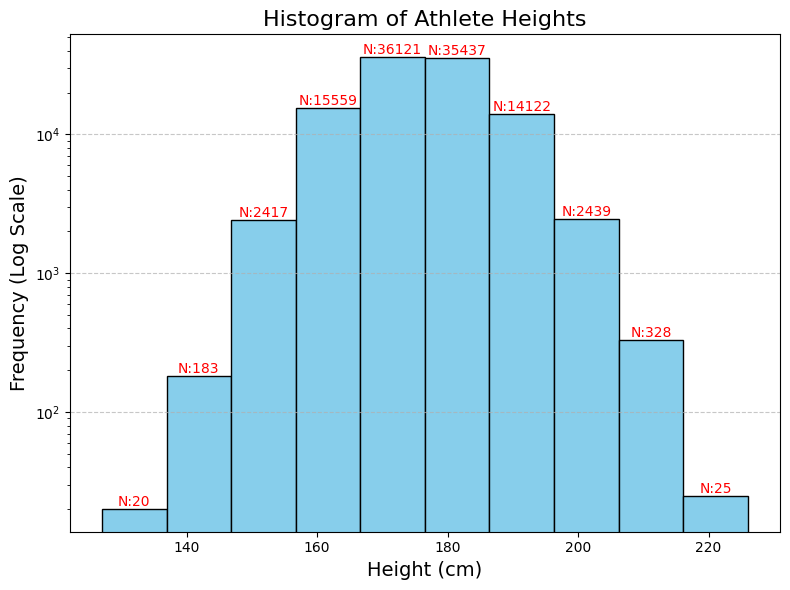

In [77]:
import matplotlib.pyplot as plt

# Drop NaN values for height_cm
heights = bios['height_cm'].dropna()

# Create a histogram for athlete heights
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(heights, bins=10, color='skyblue', edgecolor='black', log=True)

# Annotate the counts on top of each bar
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    if count > 0:  # Only annotate non-zero bins
        plt.text(
            x=(bin_left + bin_right) / 2,  # Position the text at the center of the bin
            y=count,
            s='N:'+str(int(count)),
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment
            fontsize=10,
            color='Red'
        )

# Customize the plot
plt.title("Histogram of Athlete Heights", fontsize=16)
plt.xlabel("Height (cm)", fontsize=14)
plt.ylabel("Frequency (Log Scale)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()